In [1]:
# Dependencies
import pandas as pd
from splinter import Browser
from webdriver_manager.chrome import ChromeDriverManager
from bs4 import BeautifulSoup as bs
import requests


In [2]:
# Setup splinter
executable_path = {'executable_path': ChromeDriverManager().install()}
browser = Browser('chrome', **executable_path, headless=False)

In [3]:
# URL of page to be scraped
url = 'https://data-class-mars-challenge.s3.amazonaws.com/Mars/index.html'
browser.visit(url)

In [4]:
# Retrieve page from browser
html = browser.html
# Create BeautifulSoup object; parse with html parser ('lxml')    
soup = bs(html, 'html.parser')
# Retrieve the parent divs for all articles
#headlines = soup.find_all('div', class_='list_text')
soup

<html lang="en"><head>
<meta charset="utf-8"/>
<meta content="width=device-width, initial-scale=1" name="viewport"/>
<meta content="" name="description"/>
<meta content="Mark Otto, Jacob Thornton, and Bootstrap contributors" name="author"/>
<meta content="Hugo 0.84.0" name="generator"/>
<title>Mars Temperature Data</title>
<link href="https://getbootstrap.com/docs/5.0/examples/jumbotron/" rel="canonical"/>
<!-- Bootstrap core CSS -->
<link crossorigin="anonymous" href="https://stackpath.bootstrapcdn.com/bootstrap/4.3.1/css/bootstrap.min.css" integrity="sha384-ggOyR0iXCbMQv3Xipma34MD+dH/1fQ784/j6cY/iJTQUOhcWr7x9JvoRxT2MZw1T" rel="stylesheet"/>
<style>
    .bd-placeholder-img {
      font-size: 1.125rem;
      text-anchor: middle;
      -webkit-user-select: none;
      -moz-user-select: none;
      user-select: none;
    }

    @media (min-width: 768px) {
      .bd-placeholder-img-lg {
        font-size: 3.5rem;
      }
    }
  </style>
</head>
<body>
<main>
<div class="container py-4">


In [5]:
# Close the browser after scraping    
browser.quit()

In [7]:
#Find table header from html
header = soup.find_all('th')
print(header[2].text)
#type(header[2].text)
len(header)

sol


7

In [9]:

#Create a pandas dataframe to store Mars Temperature Data
mars_temp_df = pd.DataFrame(columns=[header[0].text, header[1].text, header[2].text, header[3].text, header[4].text, header[5].text, header[6].text])
mars_temp_df


,id,terrestrial_date,sol,ls,month,min_temp,pressure


4. Assemble the scraped data into a Pandas DataFrame. The columns should have the same headings as the table on the website. Here’s an explanation of the column headings:

In [10]:
#Scrape the table data from the html
#Find all table rows
rows = soup.find_all('tr', class_='data-row')
#Etarate the rows data and store in the dataframe
for row in rows:
    cells = row.find_all('td')
    mars_temp_df = mars_temp_df.append({header[0].text: cells[0].text, header[1].text: cells[1].text, header[2].text: cells[2].text, header[3].text: cells[3].text, header[4].text: cells[4].text, header[5].text: cells[5].text, header[6].text: cells[6].text}, ignore_index=True)
#Set the index to the ID column
mars_temp_df = mars_temp_df.set_index('id')
#Display the dataframe
mars_temp_df.head(10)   


,terrestrial_date,sol,ls,month,min_temp,pressure
id,,,,,,
2,2012-08-16,10,155,6,-75.0,739.0
13,2012-08-17,11,156,6,-76.0,740.0
24,2012-08-18,12,156,6,-76.0,741.0
35,2012-08-19,13,157,6,-74.0,732.0
46,2012-08-20,14,157,6,-74.0,740.0
57,2012-08-21,15,158,6,-78.0,740.0
68,2012-08-22,16,158,6,-77.0,740.0
79,2012-08-23,17,159,6,-76.0,742.0
112,2012-08-27,21,161,6,-74.0,741.0


5. Examine the data types of all the DataFrame columns. If necessary, cast (or convert) the data to the appropriate datetime, int, or float data types.

In [12]:
#Find the data types of the columns
mars_temp_df.dtypes

terrestrial_date    object
sol                 object
ls                  object
month               object
min_temp            object
pressure            object
dtype: object

In [13]:
#Convert the id column to integer
#mars_temp_df['id'] = mars_temp_df['id'].astype(int)
#Convert the date column to datetime
mars_temp_df['terrestrial_date'] = pd.to_datetime(mars_temp_df['terrestrial_date'])
#Convert the sol column to integer
mars_temp_df['sol'] = mars_temp_df['sol'].astype(int)
#convert the ls column to float
mars_temp_df['ls'] = mars_temp_df['ls'].astype(float)
#Convert the month column to integer
mars_temp_df['month'] = mars_temp_df['month'].astype(int)
#Convert the min_temp column to float
mars_temp_df['min_temp'] = mars_temp_df['min_temp'].astype(float)
#Convert the pressure column to float
mars_temp_df['pressure'] = mars_temp_df['pressure'].astype(float)

In [14]:
mars_temp_df.head(10)

,terrestrial_date,sol,ls,month,min_temp,pressure
id,,,,,,
2,2012-08-16,10,155.0,6,-75.0,739.0
13,2012-08-17,11,156.0,6,-76.0,740.0
24,2012-08-18,12,156.0,6,-76.0,741.0
35,2012-08-19,13,157.0,6,-74.0,732.0
46,2012-08-20,14,157.0,6,-74.0,740.0
57,2012-08-21,15,158.0,6,-78.0,740.0
68,2012-08-22,16,158.0,6,-77.0,740.0
79,2012-08-23,17,159.0,6,-76.0,742.0
112,2012-08-27,21,161.0,6,-74.0,741.0


6. Answer the following question: How many months exist on Mars?
7. Answer the following question: How many Martian (and not Earth) days' worth of data exist in the scraped dataset?

In [15]:
#How many months exist on Mars?
print(f"There are {mars_temp_df['month'].nunique()} months on Mars")
#How many Martian (and not Earth) days' worth of data exist in the scraped dataset?
print(f"There are {mars_temp_df['sol'].nunique()} Martian days' worth of data in the scraped dataset")


There are 12 months on Mars
There are 1867 Martian days' worth of data in the scraped dataset


8. Answer the following question: What are the coldest and the warmest months on Mars (at the location of Curiosity)? Get the answer by averaging the minimum daily temperature of all the months. Plot the results as a bar chart.

The coldest month on Mars is 3 with an average minimum temperature of -83.31 degrees Farenheit
The warmest month on Mars is 8 with an average minimum temperature of -68.38 degrees Farenheit


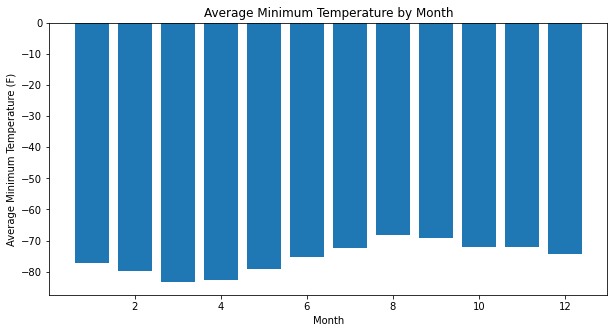

In [16]:
import matplotlib.pyplot as plt
#Answer the following question: What are the coldest and the warmest months on Mars/ 
# (at the location of Curiosity)? Get the answer by averaging the minimum daily /
# temperature of all the months. Plot the results as a bar chart.

#Group the dataframe by month and calculate the average minimum temperature
average_min_temp = mars_temp_df.groupby('month')['min_temp'].mean().round(2)

#Find the coldest month
print(f"The coldest month on Mars is {average_min_temp.idxmin()} with an average minimum temperature of {average_min_temp.min()} degrees Farenheit")
#Find the warmest month
print(f"The warmest month on Mars is {average_min_temp.idxmax()} with an average minimum temperature of {average_min_temp.max()} degrees Farenheit")

#Plot the results as a bar chart
plt.figure(figsize=(10,5))
plt.bar(average_min_temp.index, average_min_temp.values)
plt.title('Average Minimum Temperature by Month')
plt.xlabel('Month')
plt.ylabel('Average Minimum Temperature (F)')
plt.savefig('images/average_min_temp_by_month.png')
plt.show()

9. Answer the following question: Which months have the lowest and the highest atmospheric pressure on Mars? Get the answer by averaging the daily atmospheric pressure of all the months. Plot the results as a bar chart.

The month with the lowest atmospheric pressure on Mars is 6 with an average pressure of 745.05 Pa
The month with the highest atmospheric pressure on Mars is 9 with an average pressure of 913.31 Pa


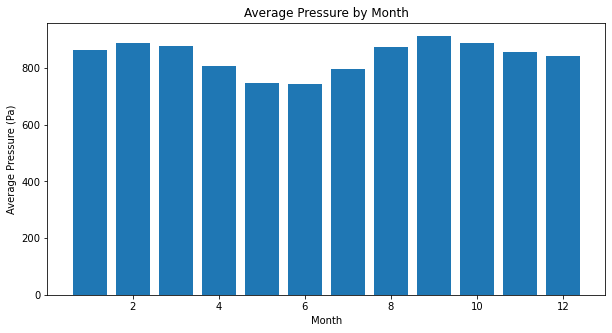

In [17]:
#Which months have the lowest and the highest atmospheric pressure on Mars?

#Group the dataframe by month and calculate the average pressure
avg_pressure = mars_temp_df.groupby('month')['pressure'].mean().round(2)
avg_pressure
#Find the month with the lowest atmospheric pressure
print(f"The month with the lowest atmospheric pressure on Mars is {avg_pressure.idxmin()} with an average pressure of {avg_pressure.min()} Pa")
#Find the month with the highest atmospheric pressure
print(f"The month with the highest atmospheric pressure on Mars is {avg_pressure.idxmax()} with an average pressure of {avg_pressure.max()} Pa")
#Plot the results as a bar chart
plt.figure(figsize=(10,5))
plt.bar(avg_pressure.index, avg_pressure.values)
plt.title('Average Pressure by Month')
plt.xlabel('Month')
plt.ylabel('Average Pressure (Pa)')
plt.savefig('images/average_pressure_by_month.png')
plt.show()

10. Answer the following question: About how many terrestrial (Earth) days exist in a Martian year? That is, in the time that Mars circles the Sun once, how many days elapse on Earth? Visually estimate the result by plotting the daily minimum temperature.

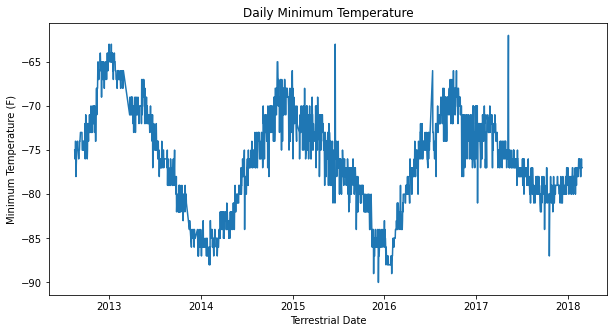

In [16]:
#About how many terrestrial (Earth) days exist in a Martian year?

#Plot the daily minimum temperature
plt.figure(figsize=(10,5))
plt.plot(mars_temp_df['terrestrial_date'], mars_temp_df['min_temp'])
plt.title('Daily Minimum Temperature')
plt.xlabel('Terrestrial Date')
plt.ylabel('Minimum Temperature (F)')
plt.savefig('images/daily_min_temp.png')
plt.show()

By closely observing the Minimum daily temperature of mars, we can say Mars yearly cycle of temerature change trends is close to two years of earth years.

11. Export the DataFrame to a CSV file.

In [ ]:
#Store the dataframe in a csv file
mars_temp_df.to_csv('data/mars_temp_data.csv')
